# Plotting with Matplotlib

Needs to be imported before use:

```python
import matplotlib.pyplot as plt
```

In [1]:
import matplotlib.pyplot as plt


***
## Line plots

- Simplest plotting function is [`plot()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)
- Need to specify $y$-values, $x$-values are optional

*Example: plot list of y-values*

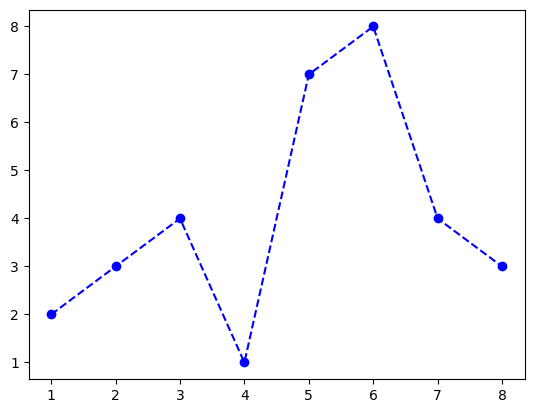

In [8]:
xvalues = [1,2,3,4,5,6,7,8]
yvalues = [2,3,4,1,7,8,4,3]

plt.plot(xvalues, yvalues, "b--o")

*Example: plot y-values vs. x-values*

*Example: plot multiple lines in one figure*


#### Colors (see [here](https://matplotlib.org/stable/tutorials/colors/colors.html) for details):

- `b`: blue
- `g`: green
- `r`: red
- `c`: cyan
- `m`: magenta
- `y`: yellow
- `k`: black
- `w`: white

#### Line styles

-   `-` solid line
-   `--` dashed line
-   `-.` dash-dotted line
-   `:` dotted line

#### Markers (see [here](https://matplotlib.org/stable/api/markers_api.html) for more):

- `o`: circle
- `s`: square
- `*`: star
- `x`: x
- `d`: (thin) diamond

*Example: plotting with multiple calls to `plot()`*

*Example: granular control over plot styles*

- `c` or `color`
- `ls` or `linestyle`
- `lw` or `linewidth`
- `marker`
- `ms` or `markersize`
- `alpha` (for transparency)

Details: See _Other Parameters_ section in [`plot()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)

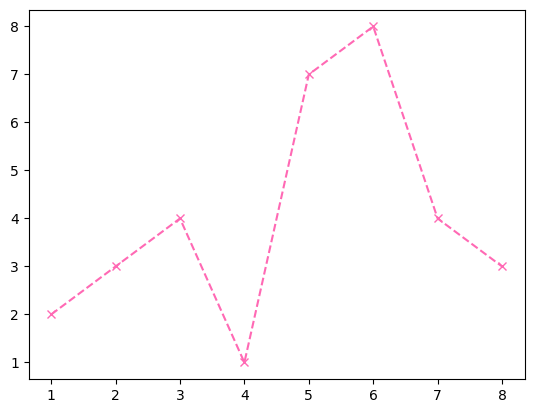

In [13]:
plt.plot(xvalues, yvalues, color = "hotpink", linestyle = "--", marker = "x")

<div class="alert alert-info">
<h3> Your turn</h3>
Use the data files located in the folder <TT>../data/FRED</TT> to perform the following tasks:
<ol>
    <li>Load the data in <TT>REALRATE.csv</TT> and <TT>FEDFUNDS.csv</TT> into two different DataFrames.
        The files contain the 1-year real interest rate and the Federal Funds rate at monthly frequency.
        <br/>
        <i>Hint:</i> Use <TT>pd.read_csv(..., parse_dates=['DATE'], index_col='DATE')</TT> to automatically parse strings stored in the <TT>DATE</TT> column as dates and set <TT>DATE</TT> as the index.
        </li>
    <li>Plot the <TT>REALRATE</TT> using a blue dashed line with line width 0.5 and <TT>FEDFUNDS</TT> using an orange line with line width 0.75 in the <i>same</i> figure.</li>
</ol>
</div>

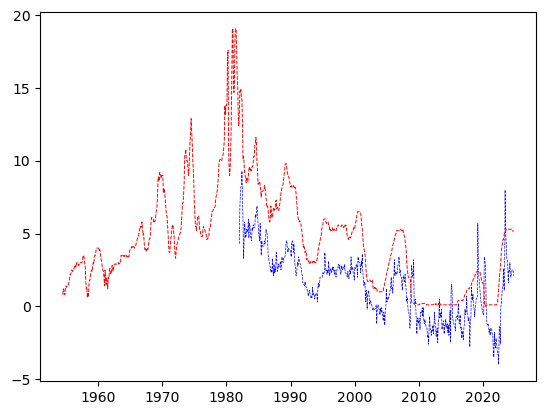

In [37]:
DATA_PATH = "..//data//FRED"

file1 = f'{DATA_PATH}/REALRATE.csv'
file2 = f'{DATA_PATH}/FEDFUNDS.csv'

import pandas as pd

df1 = pd.read_csv(file1, parse_dates = ['DATE'])
df2 = pd.read_csv(file2, parse_dates = ['DATE'])

plt.plot(df1["DATE"], df1["REALRATE"], color = "blue", ls = "--", lw = "0.5")
plt.plot(df2["DATE"], df2["FEDFUNDS"], color = "red", ls = "--", lw = "0.7")



***
## Scatter plots

- Plot a sequence of $y$-values against a sequence of $x$-values
- Optional: Assign colors or marker sizes to each individual point
- See [`scatter()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) 

*Example: Randomly generated scatter plot*

In [42]:
import numpy as np

xvalues = np.linspace(0,1.0,50)

rng = np.random.default_rng(123)

yvalues = rng.random(len(xvalues))

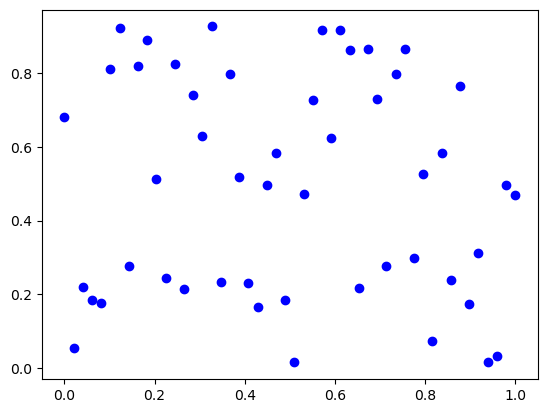

In [50]:
plt.scatter(xvalues, yvalues, color = "blue")

*Example: Set individual marker sizes*

<div class="alert alert-info">
<h3> Your turn</h3>
Use the data files located in the folder <TT>../data/FRED</TT> to perform the following tasks:
<ol>
    <li>Load the data in <TT>REALRATE.csv</TT> and <TT>FEDFUNDS.csv</TT> into two different DataFrames.
        The files contain the 1-year real interest rate and the Federal Funds rate at monthly frequency.
        <br/>
        <i>Hint:</i> Use <TT>pd.read_csv(..., parse_dates=['DATE'], index_col='DATE')</TT> to automatically parse strings stored in the <TT>DATE</TT> column as dates and set <TT>DATE</TT> as the index.
        </li>
    <li>Create a scatter plot of <TT>REALRATE</TT> (on the y-axis) against <TT>FEDFUNDS</TT> (on the x-axis).
    Specify the arguments <TT>edgecolors='blue'</TT> and <TT>color='none'</TT> to plot the data as blue rings.
    <br/>
    <i>Hint:</i> <TT>scatter()</TT> requires the arguments to be of equal length, which is not the case here.
    Restrict the data to the same time period, for example by using <TT>join(..., how='inner')</TT>.
    </li>
</ol>
</div>

,DATE,REALRATE
0,1982-01-01,4.3
1,1982-02-01,6.7
2,1982-03-01,7.7
3,1982-04-01,8.2
4,1982-05-01,8.3
...,...,...
509,2024-06-01,2.3
510,2024-07-01,2.5
511,2024-08-01,2.5
512,2024-09-01,2.4


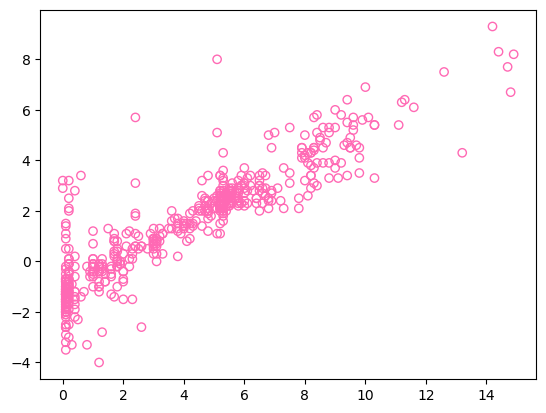

In [62]:
both = df1.set_index("DATE").join(df2.set_index("DATE"), how = "inner")

plt.scatter(both["FEDFUNDS"], both["REALRATE"], edgecolor = "hotpink", color = "none")


***
## Plotting categorical data

- Discrete (small) number of values on $x$-axis
- Vertical bars: [`bar()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html)
- Horizontal bars: [`barh()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.barh.html)

*Example: Largest municipalities in Norway*

- Categories: 'Oslo', 'Bergen', 'Trondheim', 'Stavanger'
- Population: 717710, 291940,  214565, 149048

In [64]:
municipalities = ['Oslo', 'Bergen', 'Trondheim', 'Stavanger']
population = np.array([717710, 291940,  214565, 149048]) / 1000


Text(0.5, 1.0, 'BAR CHART')

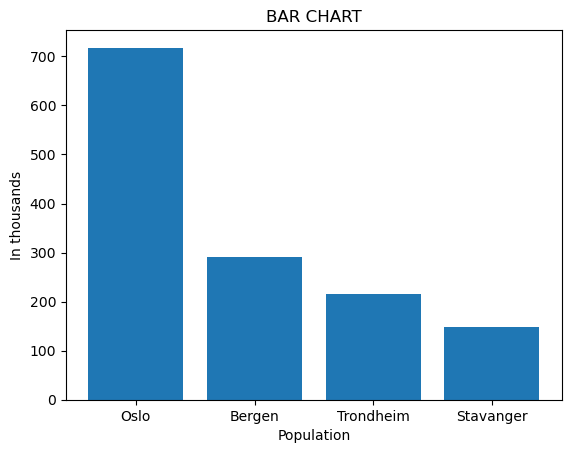

In [68]:
plt.bar(municipalities, population)
plt.ylabel("In thousands")
plt.xlabel("Population")
plt.title("BAR CHART")

Text(0.5, 1.0, 'BAR CHART')

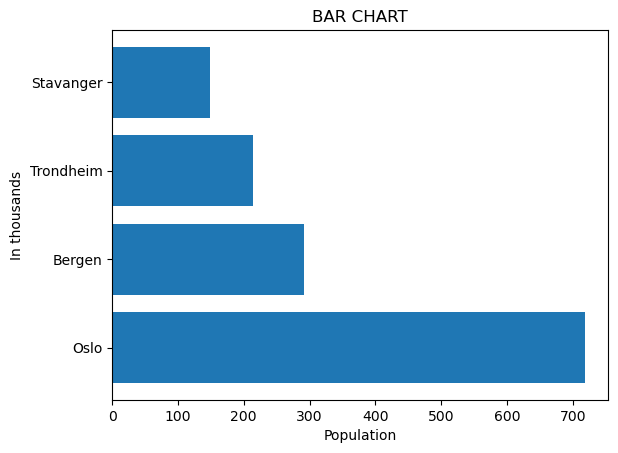

In [70]:
plt.barh(municipalities, population)
plt.ylabel("In thousands")
plt.xlabel("Population")
plt.title("BAR CHART")

*Example: Horizontal bar chart*

***
## Adding labels and annotations

-   Titles: [`title()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.title.html) 
    and [`suptitle()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.suptitle.html) 
-   Axes labels: 
    [`xlabel()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlabel.html) 
    and [`ylabel()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylabel.html)
-   Legend:
    [`legend()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html)
-   Add annotations (text): [`text()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html)

*Example: Simple plot with title, labels, etc.*

***
## Plot limits, ticks and tick labels

-   Plot limits:
    [`xlim()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlim.html) and 
    [`ylim()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylim.html)
-   Ticks and tick labels:
    [`xticks()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html) 
    or [`yticks()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.yticks.html)


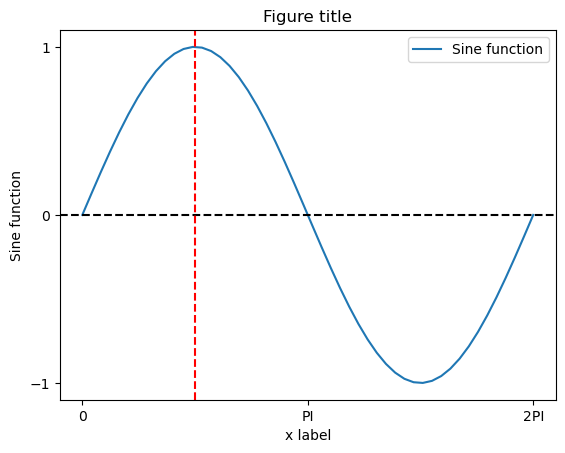

In [89]:
xvalues = np.linspace(0, 2*np.pi, 50)
yvalues = np.sin(xvalues)

plt.plot(xvalues, yvalues)
plt.xlabel("x label")
plt.ylabel("Sine function")
plt.title("Figure title")

plt.xticks([0, np.pi, 2*np.pi], ["0", "PI", "2PI"])
plt.yticks([1,0,-1])
plt.legend(["Sine function"], loc = "upper right")

plt.axhline(0, ls = '--', color = 'black')
plt.axvline(np.pi/2, ls = "--", color = "red")


*Example: Plot sine function*

***

## Adding straight lines

- Horizontal line: [`axhline()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axhline.html)
- Vertical line: [`axvline()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axvline.html)
- Generic line: [`axline()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axline.html#matplotlib.pyplot.axline)

*Example: Adding horizontal and vertical lines to sine plot*

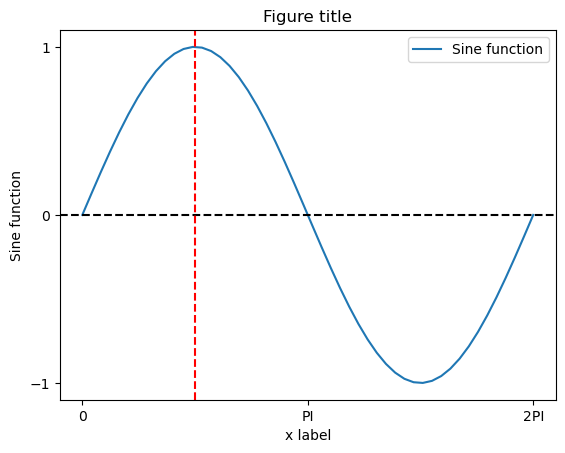

In [91]:
xvalues = np.linspace(0, 2*np.pi, 50)
yvalues = np.sin(xvalues)

fig, ax = plt.subplots()

ax.plot(xvalues, yvalues)
ax.set_xlabel("x label")
ax.set_ylabel("Sine function")
ax.set_title("Figure title")

ax.set_xticks([0, np.pi, 2*np.pi], ["0", "PI", "2PI"])
ax.set_yticks([1,0,-1])
ax.legend(["Sine function"], loc = "upper right")

ax.axhline(0, ls = '--', color = 'black')
ax.axvline(np.pi/2, ls = "--", color = "red")


***
## Object-oriented interface

-   So far: "Traditional" interface inspired by Matlab
-   Object-oriented approach: Operate on attributes of [`Figure`](https://matplotlib.org/stable/api/figure_api.html) and 
    [`Axes`](https://matplotlib.org/stable/api/axes_api.html)
-   Need to obtain `Figure` and `Axes` objects by calling 
    [`subplots()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html)
-   Use methods of `Axes` object to plot data, e.g., 
    [`Axes.plot()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.plot.html)

*Example: Repeat labels/annotation example with OO interface*

***
## Working with multiple plots (axes)

- Much more convenient using object-oriented interface
- Specify desired number of rows & columns when calling [`subplots()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html)

*Example: Create a plot with 2 panels*

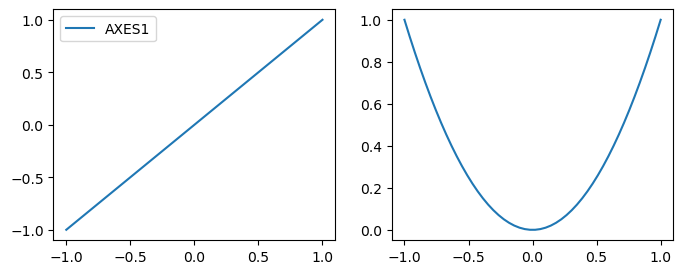

In [111]:
nrows = 1
ncols = 2

xvalues = np.linspace(-1, 1, 50)

fig, axes = plt.subplots(nrows, ncols, figsize = (8,3))

yvalues = xvalues
axes[0].plot(xvalues, yvalues, label = "AXES1")
axes[0].legend()

yvalues = xvalues**2
axes[1].plot(xvalues, yvalues)



*Example: Create a figure with 2 rows and 2 columns*

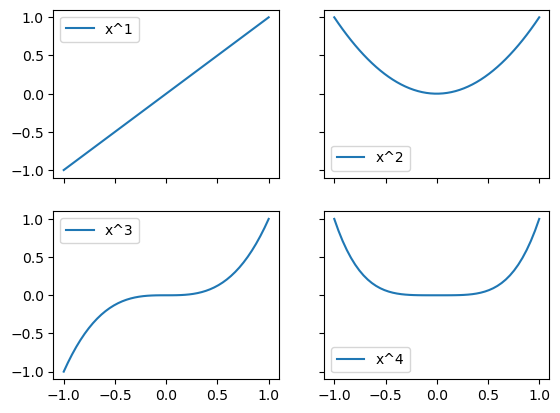

In [112]:
nrows = 2
ncols = 2

fig, axes = plt.subplots(nrows, ncols, sharex = True, sharey = True)


exponent = 1

for i in range (nrows):
    for j in range (ncols):
        ax = axes [i, j]
        yvalues = xvalues ** exponent
        ax.plot(xvalues, yvalues, label = f'x^{exponent}')
        ax.legend()

        exponent += 1


<div class="alert alert-info">
<h3> Your turn</h3>
Create a figure with 3 columns (on a single row) and plot the following functions
on the interval [0, 6]:
<ol>
    <li>Subplot 1: y = sin(x)</li>
    <li>Subplot 2: y = sin(2*x)</li>
    <li>Subplot 3: y = sin(4*x)</li>
</ol>

<i>Hint:</i> The sine function can be imported from NumPy as <TT>np.sin()</T>.
</div>

Text(0, 0.5, 'Y-values')

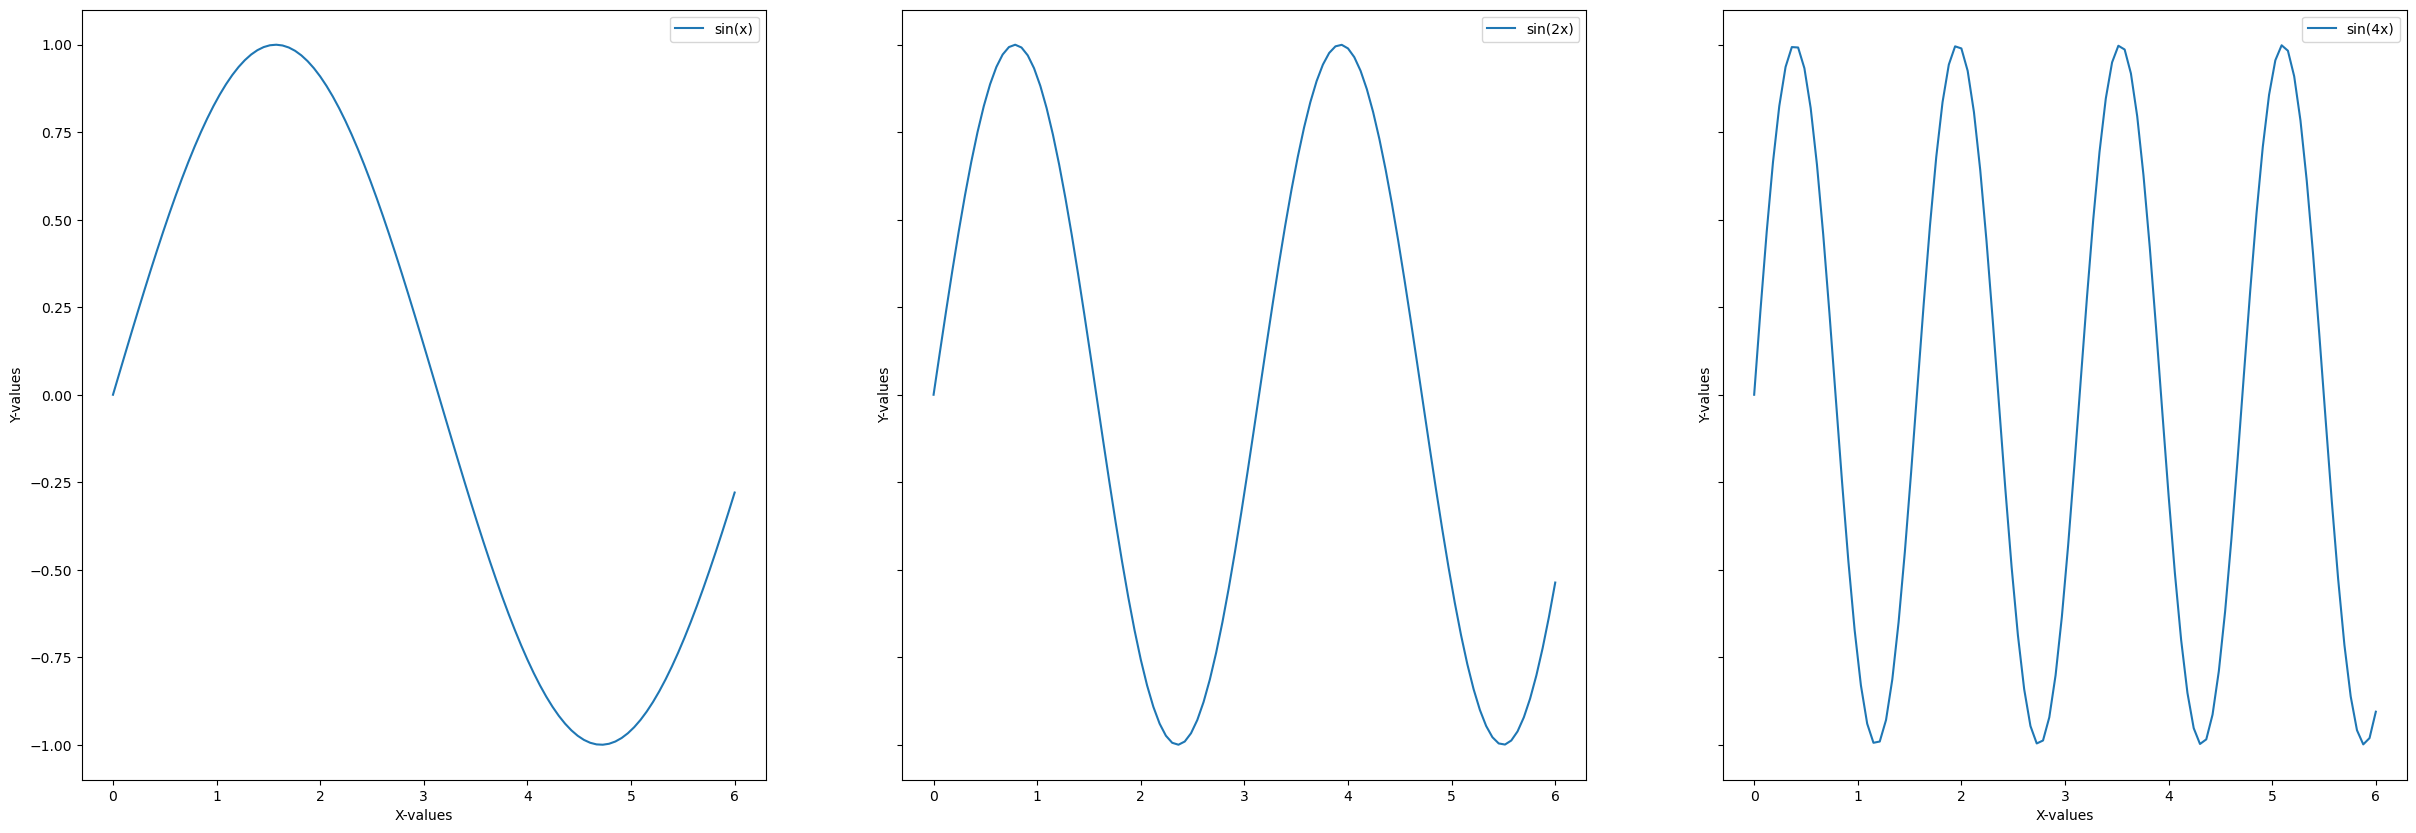

In [128]:
nrows = 1
ncols = 3

xvalues = np.linspace(0, 6, 100)

fig, axes = plt.subplots(nrows, ncols, sharex = True, sharey = True, figsize = (30, 10))

axes[0].plot(xvalues, np.sin(xvalues), label = "sin(x)")
axes[0].legend()
axes[0].set_xlabel("X-values")
axes[0].set_ylabel("Y-values")

axes[1].plot(xvalues, np.sin(2 * xvalues), label = "sin(2x)")
axes[1].legend()
axes[2].set_xlabel("X-values")
axes[1].set_ylabel("Y-values")

axes[2].plot(xvalues, np.sin(4* xvalues), label = "sin(4x)")
axes[2].legend()
axes[2].set_xlabel("X-values")
axes[2].set_ylabel("Y-values")




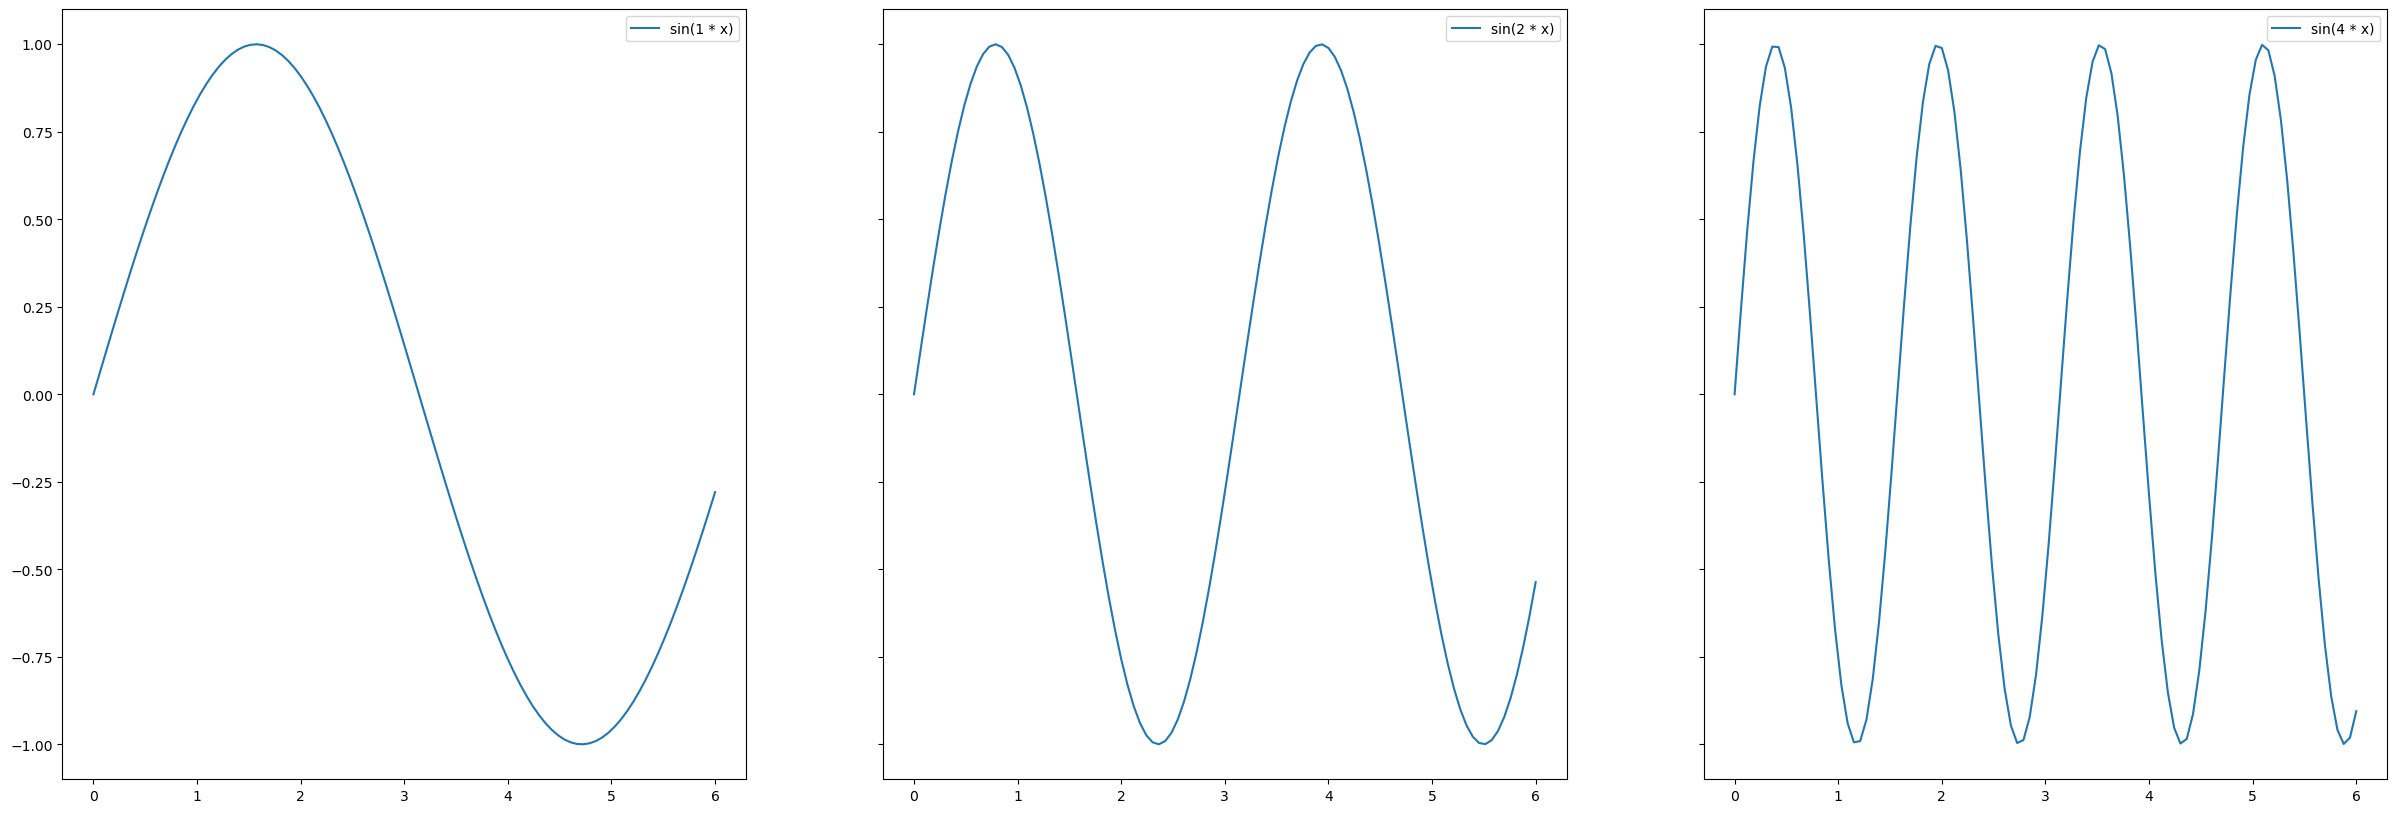

In [131]:
nrows = 1
ncols = 3

xvalues = np.linspace(0, 6, 100)

fig, axes = plt.subplots(nrows, ncols, sharex = True, sharey = True, figsize = (30, 10))

for i, ax in enumerate(axes):
    a = 2**i
    yvalues = np.sin(a * xvalues)
    ax.plot(xvalues, yvalues, label = f'sin({a} * x)')
    ax.legend()



***
# Plotting with pandas

## Bar charts

- Created with [`plot.bar()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html)

*Example: Plot bar chart of 15 largest municipalities*

-   Read in data from `population_norway.csv`

In [133]:
DATA_PATH = '..//DATA'


file = f'{DATA_PATH}/population_norway.csv'

df = pd.read_csv(file)

df

,Municipality,Population
0,Oslo,717710
1,Bergen,291940
2,Trondheim,214565
3,Stavanger,149048
4,Bærum,130921
...,...,...
351,Røst,460
352,Træna,442
353,Raarvihke,423
354,Modalen,384


<Axes: xlabel='Municipality', ylabel='Population'>

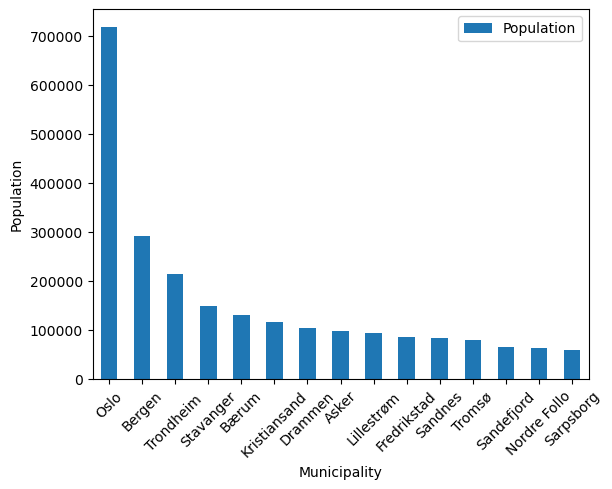

In [140]:
df = df.iloc[:15]
df.plot.bar(x = "Municipality", rot = 45, ylabel = "Population")

*Example: Plot bar chart of 15 largest municipalities w/o pandas*

***
## Plotting time series data

- Created with [`DataFrame.plot()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html) 

*Example: plot US unemployment rate*

-   Use column `UNRATE` from file `FRED.csv`

In [141]:
file = f'{DATA_PATH}/FRED.csv'

df = pd.read_csv(file)
df.head(5)

,Year,GDP,CPI,UNRATE,FEDFUNDS
0,1954,2877.7,26.9,5.6,1.0
1,1955,3083.0,26.8,4.4,1.8
2,1956,3148.8,27.2,4.1,2.7
3,1957,3215.1,28.1,4.3,3.1
4,1958,3191.2,28.9,6.8,1.6


<Axes: xlabel='Year'>

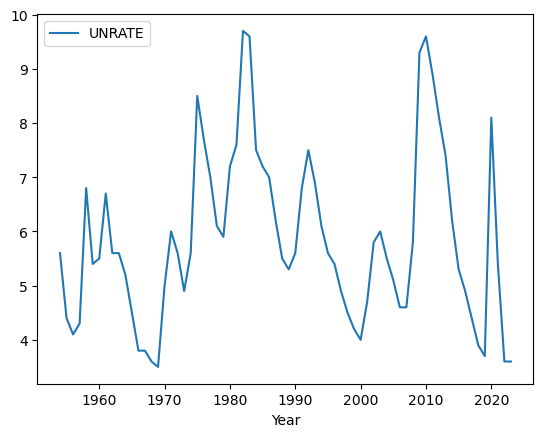

In [143]:
df.plot.line(x = "Year", y = 'UNRATE')

<div class="alert alert-info">
<h3> Your turn</h3>
Use the data files located in the folder <TT>../data/FRED</TT> to perform the following tasks:
<ol>
    <li>Load the macroeconomic time series data from <TT>FRED_monthly_all.csv</TT>.
        <br/>
        <i>Hint:</i> Use <TT>pd.read_csv(..., parse_dates=['DATE'])</TT> to automatically set parse strings as dates.
        </li>
    <li>Create a line plot, showing both the unemployment rate <TT>UNRATE</TT>
        and the inflation rate <TT>INFLATION</TT> in a single graph.
    </li>
</ol>
</div>

In [147]:
DATA_PATH = "../data/FRED"

file = f'{DATA_PATH}/FRED_monthly_all.csv'

df = pd.read_csv(file, parse_dates = ['DATE'])

df.head()



,DATE,CPI,INFLATION,UNRATE,REALRATE,FEDFUNDS,LFPART
0,1947-01-01,21.5,NaN,NaN,NaN,NaN,NaN
1,1947-02-01,21.6,NaN,NaN,NaN,NaN,NaN
2,1947-03-01,22.0,NaN,NaN,NaN,NaN,NaN
3,1947-04-01,22.0,NaN,NaN,NaN,NaN,NaN
4,1947-05-01,22.0,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='DATE'>

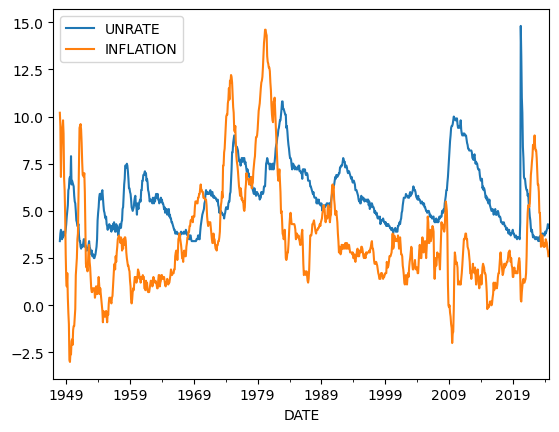

In [155]:
df.plot.line(x = "DATE", y = ["UNRATE", "INFLATION"])



***
## Scatter plots

-   Created with [`DataFrame.plot.scatter()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.scatter.html)
-   Can adjust style with many arguments accepted by Matplotlib's 
    [`scatter()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.scatter.html)
-   Use [`scatter_matrix()`](https://pandas.pydata.org/docs/reference/api/pandas.plotting.scatter_matrix.html)
    to create pairwise scatter plots for all columns in `DataFrame`

*Example: Plot US inflation vs. unemployment*

-   Use `Inflation` and `UNRATE` from `FRED.csv`

*Example: 3-by-3 plot with `scatter_matrix()`* 

-   Use `GDP_growth`, `Inflation` and `UNRATE` from `FRED.csv`